In [1]:
breed_names_path = "D:/YandexDisk/models/dog-breed-classifier.json"
model_path = "D:/YandexDisk/models/dog-breed-classifier.h5"

import warnings
warnings.filterwarnings("ignore")
import json
from tensorflow.keras.models import load_model
from keras.applications.densenet import preprocess_input
from numpy import expand_dims
from os import listdir, system
from PIL import Image
from skimage.io import imread
from matplotlib.pyplot import figure, imshow, axis

def read_json(file_name: str):
    with open(file_name) as file_in:
        return json.load(file_in)

def predict(file_name):
    img = Image.open(file_name)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img.save(file_name)

    figure(figsize=(4, 4))
    imshow(img)
    axis("off")

    img = imread(file_name)
    img = preprocess_input(img)
    img = expand_dims(img, axis=0)
    probs = model.predict(img)
    
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", breed_names_map[str(idx)])

def download_and_predict(url, file_name):
    system("curl -s {} -o {}".format(url, file_name))
    predict(file_name)
        
model = load_model(model_path)
breed_names_map = read_json(breed_names_path)

99.99% 	 pug
0.00% 	 bull_mastiff
0.00% 	 brabancon_griffon
0.00% 	 tibetan_mastiff
0.00% 	 norwegian_elkhound


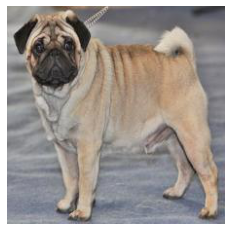

In [2]:
predict("pug.jpg")

99.69% 	 doberman
0.26% 	 miniature_pinscher
0.05% 	 tan_coonhound
0.00% 	 toy_terrier
0.00% 	 mexican_hairless


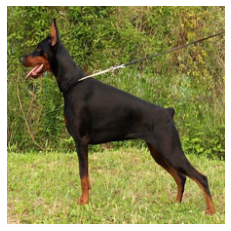

In [3]:
download_and_predict("https://upload.wikimedia.org/wikipedia/commons/7/7a/European_Dobermann.jpg",
                     "doberman.jpg")

100.00% 	 chow
0.00% 	 tibetan_mastiff
0.00% 	 samoyed
0.00% 	 pomeranian
0.00% 	 newfoundland


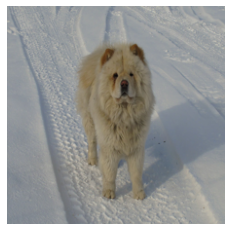

In [4]:
download_and_predict("https://upload.wikimedia.org/wikipedia/commons/c/c7/ChowChow1.jpg",
                     "chow.jpg")